In [3]:
import json
import pandas as pd
from tqdm import tqdm
import re
import matplotlib.pyplot as plt
import math

In [3]:
f = open('data.json', encoding='utf-8')
skills = json.load(f)

In [8]:
skills = skills['data']

In [15]:
skills[0]

{'text': ' фокус недели #фн сегодня ммк опубликует финансовую отчётность за 1 кв. 2020 #magn #отчетность магнит представит операционные результаты за 1 кв. 2020 #mgnt #результаты новатэк опубликует финансовую отчётность за 1 кв. 2020 #nvtk #отчетность фрс сша представит решение по процентной ставке #фрс #макро tesla опубликует финансовую отчётность за 1 кв. 2020 #tsla #отчетность microsoft опубликует финансовую отчётность за 1 кв. 2020 #msft #отчетность facebook опубликует финансовую отчётность за 1 кв. 2020 #fb #отчетность 30 апреля детский мир опубликует финансовую отчётность по мсфо за 2019 #dsky #отчетность энел россия опубликует финансовую отчётность по рсбу за 1 кв. #enru #отчетность evraz представит операционные результаты за 1 кв. 2020 #evr #результаты норникель опубликует производственные результаты за 1 кв. 2020 #gmkn #результаты русгидро представит финансовую отчётность по рсбу за 1 кв. 2020 #hydr #отчетность сд нлмк рассмотрит дивиденды за 1 кв. 2020 #nlmk #дивиденды apple 

In [16]:
all_skills = []
for i in tqdm(range(len(skills))): 
    skill_obj = skills[i]['name']
    skills_in = []
    for j in range(len(skill_obj)): 
        skills_in.append(skill_obj[j])
    all_skills.append(skills_in)

100%|████████████████████████████████████████████████████████████████████████| 19236/19236 [00:00<00:00, 663058.59it/s]


In [17]:
texts = []
for i in skills: 
    texts.append(i['text'])

In [18]:
count_of_words = []
for i in texts: 
    count_of_words.append(len(i.split(' ')))

In [19]:
sum(count_of_words) / len(count_of_words)

115.13755458515284

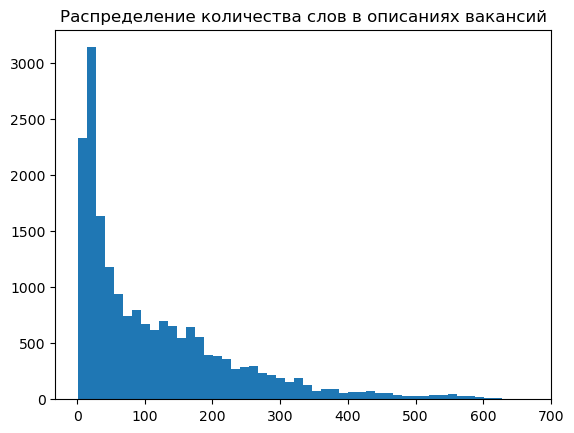

In [20]:
plt.hist(count_of_words, bins=50)
plt.title('Распределение количества слов в описаниях вакансий')
plt.show()

In [21]:
texts[0]

' фокус недели #фн сегодня ммк опубликует финансовую отчётность за 1 кв. 2020 #magn #отчетность магнит представит операционные результаты за 1 кв. 2020 #mgnt #результаты новатэк опубликует финансовую отчётность за 1 кв. 2020 #nvtk #отчетность фрс сша представит решение по процентной ставке #фрс #макро tesla опубликует финансовую отчётность за 1 кв. 2020 #tsla #отчетность microsoft опубликует финансовую отчётность за 1 кв. 2020 #msft #отчетность facebook опубликует финансовую отчётность за 1 кв. 2020 #fb #отчетность 30 апреля детский мир опубликует финансовую отчётность по мсфо за 2019 #dsky #отчетность энел россия опубликует финансовую отчётность по рсбу за 1 кв. #enru #отчетность evraz представит операционные результаты за 1 кв. 2020 #evr #результаты норникель опубликует производственные результаты за 1 кв. 2020 #gmkn #результаты русгидро представит финансовую отчётность по рсбу за 1 кв. 2020 #hydr #отчетность сд нлмк рассмотрит дивиденды за 1 кв. 2020 #nlmk #дивиденды apple опубликуе

In [22]:
data_texts = pd.DataFrame()
data_texts['description'] = texts 

In [23]:
data_texts

,description
0,фокус недели #фн сегодня ммк опубликует финан...
1,#lsrg лср - операционные результаты (2019г) *п...
2,#chmf северсталь (chmf) впервые поставила в бр...
3,"""версия: многоходовочка по роснефти роснефтега..."
4,🟢 новости к этому часу ⚪️фрс сша необходимо пр...
...,...
19231,"""#nlmk ""новолипецкий металлургический комбинат..."
19232,за 2020 год на мосбирже может появиться 10 но...
19233,"""#five #ритейлеры #россия сделки ""магнита"" с ""..."
19234,upd: та интер рао upd: та новатэк


In [28]:
skills[1]['name']

[[6, 9], [1, 5]]

In [29]:
all_intervals = []
all_skills = []
left_shift = 0
for j in range(len(skills)):
    intervals = []
    skiller = []
    skills_text = data_texts.loc[j]['description']
    for i in range(len(skills[j]['name'])):
        if skills[j]['name'][i][1] <= len(skills_text):
            interval = skills[j]['name'][i]
            start = interval[0] - left_shift
            end = interval[1] - left_shift
            while skills_text[start] == ' ' and start < end: 
                start += 1
            while skills_text[end - 1] == ' ' and end > start:
                end -= 1
            left = skills_text[:start].count(' ')
            right = skills_text[:end].count(' ')
            intervals.append(str(start - left)+':'+str(end - right))
            skiller.append(skills_text[start:end])

    all_intervals.append(intervals)
    all_skills.append(skiller)

In [30]:
counter = 0
for i in range(len(all_skills)): 
    counter += len(all_skills[i]) 
counter

45868

In [31]:
found_skills = []
for i in all_intervals: 
    found_skills.append(';'.join(i))

In [32]:
found_name_skills = []
for i in all_skills: 
    found_name_skills.append(';'.join(i))

In [33]:
len(found_skills)

19236

In [34]:
data_texts['desc_skills'] = found_name_skills
data_texts['skills_ind'] = found_skills

In [35]:
data_texts

,description,desc_skills,skills_ind
0,фокус недели #фн сегодня ммк опубликует финан...,magn;ммк,65:69;21:24
1,#lsrg лср - операционные результаты (2019г) *п...,лср;lsrg,5:8;1:5
2,#chmf северсталь (chmf) впервые поставила в бр...,chmf;северсталь;chmf,16:20;5:15;1:5
3,"""версия: многоходовочка по роснефти роснефтега...",роснефти;роснефти;роснефте;роснефти;роснефте,213:221;204:212;182:190;24:32;32:40
4,🟢 новости к этому часу ⚪️фрс сша необходимо пр...,nvtk;новатэк,970:974;466:473
...,...,...,...
19231,"""#nlmk ""новолипецкий металлургический комбинат...",нлмк;nlmk;нлмк,705:709;2:6;752:756
19232,за 2020 год на мосбирже может появиться 10 но...,эталон груп,220:230
19233,"""#five #ритейлеры #россия сделки ""магнита"" с ""...",,
19234,upd: та интер рао upd: та новатэк,новатэк,20:27


In [36]:
data_texts.to_csv('data_less_ind.csv', index=False)